## 뉴스 기사 제목 + 해당 기사의 본문
- 네이버 증권 주요 뉴스

In [1]:
import requests
from bs4 import BeautifulSoup

# 크롤링할 페이지 URL 설정
url = "https://finance.naver.com/news/mainnews.naver"

# 요청 시작
response = requests.get(url)
articles = []

# HTTP 요청이 성공적인지 확인
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # 뉴스 기사 목록을 포함한 부분을 찾습니다.
    news_list = soup.find("ul", class_="newsList")

    # 뉴스 제목과 링크 수집
    news_articles = news_list.find_all("li")

    for article in news_articles:
        # 뉴스 제목 추출
        title = article.find("dd").text.strip()

        # 뉴스 본문 링크 가져오기
        article_link = article.find("a")["href"]

        # 뉴스 본문 페이지에 접근
        article_url = f"https://finance.naver.com{article_link}"
        article_response = requests.get(article_url)

        if article_response.status_code == 200:
            article_soup = BeautifulSoup(article_response.text, "html.parser")

            # "link_news" 클래스를 가진 요소를 찾아서 제거합니다.
            for link_news_element in article_soup.find_all("div", class_="link_news"):
                link_news_element.decompose()

            # 뉴스 본문 추출 (articleCont 내부 텍스트만 추출)
            article_content = article_soup.find("div", id="content").get_text(separator=" ").strip()

            # 데이터 프레임 만들기 위한 제목, 본문
            articles.append (
                {
                    "title": title,
                    "content": article_content
                }
            )
        else:
            print(f"뉴스 본문 페이지에 접근할 수 없습니다: {article_url}")
else:
    print("페이지를 가져올 수 없습니다.")


In [2]:
import pandas as pd

df = pd.DataFrame(articles)
df

,title,content
0,“에코프로 형제 뒤꽁무니라도”…코스닥 시총 10위권 두고 순위 다툼,레인보우로보틱스 2족 보행 로봇 ‘휴보’. [사진 출처 = 레인보우로보틱스] 최근 ...
1,英 반도체 ‘ARM’ 상장 첫날 25%↑…애플·알파벳까지 끌어올릴까 [투자360],공모가 최상단 확정 이어 상장 첫날 주가 급등 ‘코너스톤’ 애플·알파벳 동반 상승…...
2,"""비트코인, 장기 모멘텀 상실...2만 달러까지 추락 가능""",비트코인 가격이 2만6천 달러 선에서 횡보하고 있는 가운데 월가 시장조사업체 울프 ...
3,"2차전지 '하락 베팅'에 개미 우르르…""상반기 같은 급등 힘들다""",/사진=임종철 디자인기자 2차전지 인버스 ETF(상장지수펀드)에 대한 폭발적인 개인...
4,"달러화, 지표 강세 등에 6개월래 최고치…금값은 3주새 최저","미국 달러화, 통화가치 상승 (PG) [장현경 제작] 사진합성 (서울=연합뉴스)..."
5,"‘위기의 2차전지株’ 긴급 진단…“非정상의 정상화 과정, 4분기 완만한 반등” [투...",“개인 투심 약화…기관·외국인까지 2차전지서 눈 돌려” “소재주 추가 조정…배터리셀...
6,"'헤지펀드 제왕' 켄 그리핀 ""美 증시 강세장 한계점 임박""",사진: 켄 그리핀 시타델 CEO 월가에서 헤지펀드 제왕으로 불리는 켄 그리핀 시타델...
7,"‘펀더멘털’ 월가, 금리인상은 더 이상 문제 아냐! 韓 경제 폭망한다는데, 주가 왜...",오늘 미국 증시는 금리인상 부담이 완화되면서 다음 달에 발표될 양대 펀더멘털 요인이...
8,"“삼성전자 평단 4만8000원, 다시 안 올 가격 맞죠?” [투자360]",9월 들어 7만원대 안정 흐름 7만원 이상 매수자는 투자손실 만회 기대 증권사 “3...
9,"'신주인수권 단돈 1원'…SK리츠, 유상증자 잡음에 주주 외면",'헐값에라도 처분하자'…1~24원으로 거래 실권주 발생 우려 ↑…주가 하락세 이어져...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20 non-null     object
 1   content  20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [4]:
df.head()

,title,content
0,“에코프로 형제 뒤꽁무니라도”…코스닥 시총 10위권 두고 순위 다툼,레인보우로보틱스 2족 보행 로봇 ‘휴보’. [사진 출처 = 레인보우로보틱스] 최근 ...
1,英 반도체 ‘ARM’ 상장 첫날 25%↑…애플·알파벳까지 끌어올릴까 [투자360],공모가 최상단 확정 이어 상장 첫날 주가 급등 ‘코너스톤’ 애플·알파벳 동반 상승…...
2,"""비트코인, 장기 모멘텀 상실...2만 달러까지 추락 가능""",비트코인 가격이 2만6천 달러 선에서 횡보하고 있는 가운데 월가 시장조사업체 울프 ...
3,"2차전지 '하락 베팅'에 개미 우르르…""상반기 같은 급등 힘들다""",/사진=임종철 디자인기자 2차전지 인버스 ETF(상장지수펀드)에 대한 폭발적인 개인...
4,"달러화, 지표 강세 등에 6개월래 최고치…금값은 3주새 최저","미국 달러화, 통화가치 상승 (PG) [장현경 제작] 사진합성 (서울=연합뉴스)..."


In [5]:
df.to_csv('news_data.csv', index=False)

## 형태소 분석
- 명사만 추출하기

In [6]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.9 MB/s eta 0:00:00


In [7]:
from konlpy.tag import Okt
from tqdm import tqdm

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20 non-null     object
 1   content  20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [9]:
df.dropna(inplace=True)

In [10]:
okt = Okt()
poss_dic = {}

for i in tqdm(df.index):
    # 1. (형태소, 품사) 형식의 튜플들로 분리하는 품사 태깅의 작업을 하여 리스트로 저장
    content = df.loc[i, "content"]
    content = str(content)
    poss = okt.pos(content, norm=True, stem=True)

    # 2. 명사인 것만 poss_lst에 저장 (1글자인 단어는 제외)
    poss_lst = []
    for word, tag in poss:
        if tag in ['Noun'] and len(word) > 1:
            poss_lst.append(word)

    # 3. 기사의 인덱스를 key로 갖고 본문을 형태소 단위로 분리한 리스트를 value
    poss_dic[i] = poss_lst


100%|██████████| 20/20 [00:29<00:00,  1.48s/it]


In [11]:
poss_dic

{0: ['레인보우',
  '로보틱스',
  '보행',
  '로봇',
  '휴보',
  '사진',
  '출처',
  '레인보우',
  '로보틱스',
  '최근',
  '시가총액',
  '규모',
  '코스닥',
  '종목',
  '자리다툼',
  '모습',
  '에코',
  '프로',
  '형제',
  '코스닥',
  '상위',
  '차지',
  '로봇',
  '대장',
  '주격',
  '레인보우',
  '로보틱스',
  '상승세',
  '가운데',
  '어비스',
  '굴욕',
  '증권',
  '전일',
  '종가',
  '기준',
  '코스닥',
  '시장',
  '레인보우',
  '로보틱스',
  '에스엠',
  '각각',
  '상위',
  '이름',
  '연초',
  '해도',
  '순위',
  '레인보우',
  '로보틱스',
  '껑충',
  '내달',
  '두산',
  '로보틱스',
  '상장',
  '로봇',
  '대한',
  '투자',
  '심리',
  '연일',
  '때문',
  '삼성',
  '한화',
  '대기업',
  '로봇',
  '사업',
  '면서',
  '레인보우',
  '로보틱스',
  '주가',
  '올해',
  '상승',
  '지난',
  '종가',
  '기준',
  '레인보우',
  '로보틱스',
  '코스닥',
  '금세',
  '자리',
  '하반기',
  '대형',
  '신인',
  '데뷔',
  '상승세',
  '보이',
  '증권',
  '정보',
  '업체',
  '가이드',
  '기준',
  '영업',
  '이익',
  '컨센서스',
  '동기',
  '대비',
  '증가',
  '남미',
  '유럽',
  '서구',
  '지역',
  '대중성',
  '확대',
  '기반',
  '앨범',
  '매출',
  '가파른',
  '성장',
  '예상',
  '때문',
  '이선화',
  '증권',
  '연구원',
  '하반기',
  '이후',
  '대형',
  '신인',
  '아티스트',
  '데뷔',
  '수익'

In [12]:
import pandas as pd

# poss_dic 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(poss_dic, orient='index')

# CSV 파일로 저장 (index는 저장하지 않음)
df.to_csv('news_word_data.csv', index=False)


## 불용어 처리

In [13]:
pip install konlpy

In [14]:
from konlpy.tag import Komoran

In [15]:
all_words = []

for words in poss_dic.values():
    all_words.extend(words)
    all_words = list(all_words)

In [16]:
print(all_words)

['레인보우', '로보틱스', '보행', '로봇', '휴보', '사진', '출처', '레인보우', '로보틱스', '최근', '시가총액', '규모', '코스닥', '종목', '자리다툼', '모습', '에코', '프로', '형제', '코스닥', '상위', '차지', '로봇', '대장', '주격', '레인보우', '로보틱스', '상승세', '가운데', '어비스', '굴욕', '증권', '전일', '종가', '기준', '코스닥', '시장', '레인보우', '로보틱스', '에스엠', '각각', '상위', '이름', '연초', '해도', '순위', '레인보우', '로보틱스', '껑충', '내달', '두산', '로보틱스', '상장', '로봇', '대한', '투자', '심리', '연일', '때문', '삼성', '한화', '대기업', '로봇', '사업', '면서', '레인보우', '로보틱스', '주가', '올해', '상승', '지난', '종가', '기준', '레인보우', '로보틱스', '코스닥', '금세', '자리', '하반기', '대형', '신인', '데뷔', '상승세', '보이', '증권', '정보', '업체', '가이드', '기준', '영업', '이익', '컨센서스', '동기', '대비', '증가', '남미', '유럽', '서구', '지역', '대중성', '확대', '기반', '앨범', '매출', '가파른', '성장', '예상', '때문', '이선화', '증권', '연구원', '하반기', '이후', '대형', '신인', '아티스트', '데뷔', '수익', '기여', '전망', '프로젝트', '니쥬', '프로젝트', '프로젝트', '글로벌', '팬덤', '타깃', '신규', '아티스트', '데뷔', '시장', '규모', '수익', '기대', '에스엠', '순위', '이름', '연초', '해도', '코스닥', '에스엠', '열풍', '코스닥', '상위', '최근', '신인', '보이', '그룹', '라이즈', '또한', '성공', '데뷔', '이주', '주가', '기도', 

In [42]:
stop_words = ["시장", "증권", "주가", "배당",
"기업", "투자", "지난", "국내",
"올해", "상승", "금리", "기업",
"상장", "가격", "이후", "주식",
"수익", "거래", "투자자", "오늘",
"내일", "어제", "하락", "지수",
"증시", "인상", " 대비", "예상",
"지난해", "수준", "경제", "이번",
"주주", "마감", "최근", "종목",
"결정", "설명", "상황", "이익",
"발표", "현재", "다만", "흐름",
"대비", "전망", "가능성", "실적",
"상반기"
]

In [43]:
from konlpy.tag import Komoran

# 형태소 분석기 초기화
komoran = Komoran()

def remove_stopwords(word_list):
    filtered_tokens = [word for word in word_list if word not in stop_words]
    return filtered_tokens

# 불용어 처리 예제
filtered_words = remove_stopwords(all_words)
print(filtered_words)

# tags = list(processed_article)

['레인보우', '로보틱스', '보행', '로봇', '휴보', '사진', '출처', '레인보우', '로보틱스', '시가총액', '규모', '코스닥', '자리다툼', '모습', '에코', '프로', '형제', '코스닥', '상위', '차지', '로봇', '대장', '주격', '레인보우', '로보틱스', '상승세', '가운데', '어비스', '굴욕', '전일', '종가', '기준', '코스닥', '레인보우', '로보틱스', '에스엠', '각각', '상위', '이름', '연초', '해도', '순위', '레인보우', '로보틱스', '껑충', '내달', '두산', '로보틱스', '로봇', '대한', '심리', '연일', '때문', '삼성', '한화', '대기업', '로봇', '사업', '면서', '레인보우', '로보틱스', '종가', '기준', '레인보우', '로보틱스', '코스닥', '금세', '자리', '하반기', '대형', '신인', '데뷔', '상승세', '보이', '정보', '업체', '가이드', '기준', '영업', '컨센서스', '동기', '증가', '남미', '유럽', '서구', '지역', '대중성', '확대', '기반', '앨범', '매출', '가파른', '성장', '때문', '이선화', '연구원', '하반기', '대형', '신인', '아티스트', '데뷔', '기여', '프로젝트', '니쥬', '프로젝트', '프로젝트', '글로벌', '팬덤', '타깃', '신규', '아티스트', '데뷔', '규모', '기대', '에스엠', '순위', '이름', '연초', '해도', '코스닥', '에스엠', '열풍', '코스닥', '상위', '신인', '보이', '그룹', '라이즈', '또한', '성공', '데뷔', '이주', '기도', '사막', '관련', '이미지', '사진', '출처', '어비스', '반면', '어비스', '순위', '연초', '해도', '코스닥', '어비스', '자리', '어비스', '풀이', '어비스', '영업', '컨센서스', '동기', '감소

In [44]:
from collections import Counter

count = Counter(filtered_words)
tags = count.most_common(50)
tags[:50]

[('미국', 39),
 ('연구원', 37),
 ('요건', 32),
 ('물가', 28),
 ('유상증자', 28),
 ('기준', 22),
 ('대한', 22),
 ('최고', 22),
 ('포인트', 22),
 ('달러', 22),
 ('개인', 22),
 ('중국', 22),
 ('우려', 21),
 ('시간', 20),
 ('영업', 19),
 ('유가', 19),
 ('상치', 19),
 ('청약', 19),
 ('매수', 19),
 ('반도체', 18),
 ('배터리', 18),
 ('전자', 18),
 ('로보틱스', 17),
 ('카카오', 17),
 ('증가', 16),
 ('성장', 16),
 ('리츠', 16),
 ('규모', 15),
 ('가운데', 15),
 ('주목', 15),
 ('오른', 15),
 ('참여', 15),
 ('생산자', 15),
 ('유지', 15),
 ('리튬', 15),
 ('신주인수권', 15),
 ('단독', 15),
 ('이상', 14),
 ('급등', 14),
 ('기자', 14),
 ('기술', 14),
 ('기록', 14),
 ('한국', 14),
 ('개선', 14),
 ('법인', 14),
 ('때문', 13),
 ('현지', 13),
 ('지속', 13),
 ('인플레이션', 13),
 ('전장', 13)]

## 워드 클라우드 생성
- 한글 깨짐 이슈 : 폰트 설치해서 적용할 것

In [40]:
!apt-get update -qq
!apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


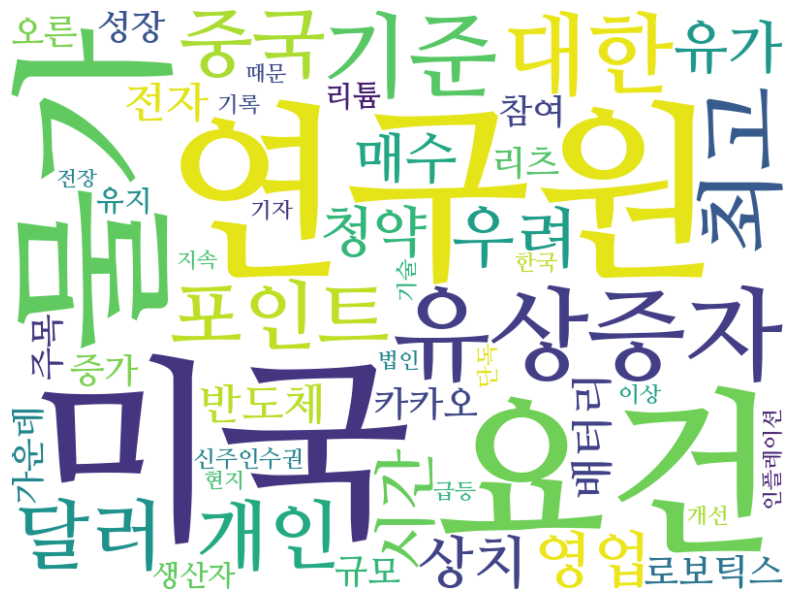

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager, rc

# 나눔 폰트 경로 설정
font_location = "/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# tags 리스트를 사전으로 변환
word_freq = {}
for tag in tags:
    word, freq = tag[0], tag[1]
    word_freq[word] = freq

# 워드 클라우드 설정
wc = WordCloud(font_path=font_location, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(word_freq)

# 워드 클라우드를 화면에 표시
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
